In [25]:
# A.2.2: Simulation of a sample

set.seed(123456789)

N <- 10

mu <- 3

sigma <- 5

x <- rnorm(N, mean = mu, sd = sigma)

dens_x <- density(x)

In [26]:
mean(x)

[1] 2.515128

In [27]:
sd(x)

[1] 5.097328

In [28]:
# A.2.3: Many imaginary samples

M <- 500

sample_est <- matrix(NA,M,N)

for (m in 1:M) {
    sample_est[m,] <- rnorm(N, mean=-3, sd=5)
}

In [29]:
# A.2.4: Law of large numbers
# If our sample is 'large enough', our estimate may be close to the true value

set.seed(123456789)

N <- 100000

x <- rnorm(N, mean = -3, sd = 5)

mean(x)

[1] -3.001334

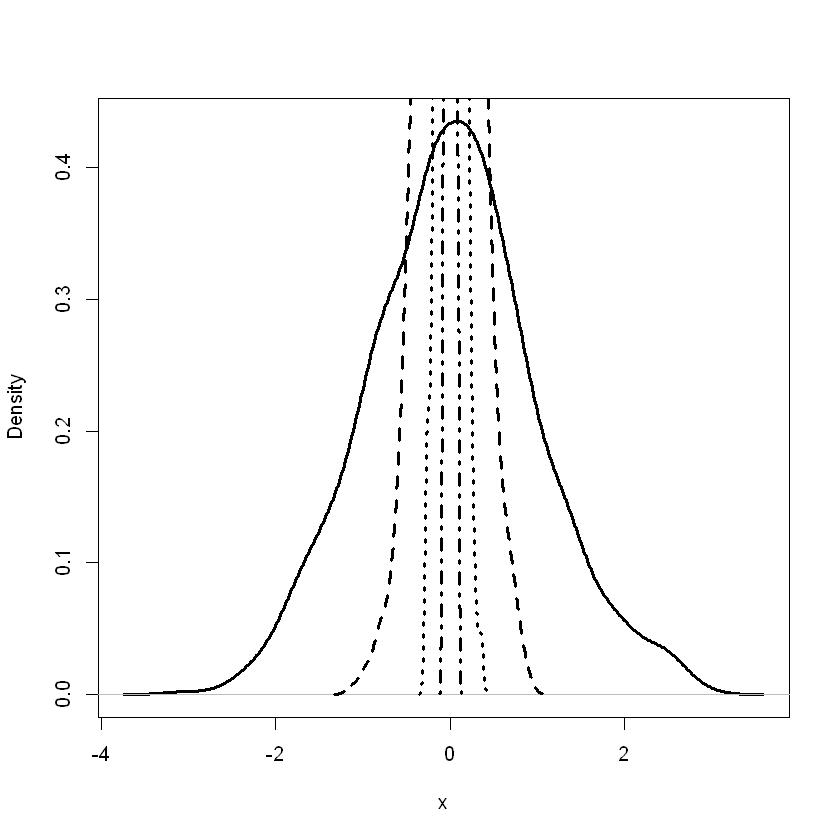

In [30]:
# A.2.5: Central Limit Theorem
# As number of observations gets large, estimated sample mean is normally distributed w/ mean equal to the true mean
# and a standard derviation equal to the true standard deviation divided by the sqrt of the number of observations

M <- 1000
sample_means <- matrix(NA,M,4)
for (m in 1:M) {
    sample_means[m,1] <- mean(rnorm(10,mean=-3,sd=5))
    sample_means[m,2] <- mean(rnorm(100,mean=-3,sd=5))
    sample_means[m,3] <- mean(rnorm(1000,mean=-3,sd=5))
    sample_means[m,4] <- mean(rnorm(10000,mean=-3,sd=5))
}


plot(density( (sample_means[,1]+3) * ((10^(.5))/5) ), type="l", lwd=3, lty=1, xlab="x", main="" )

for (i in 2:4) {
    lines( density( (sample_means[,i]+3) * ((10^(.5))/5) ), lwd=3, lty=i )
}


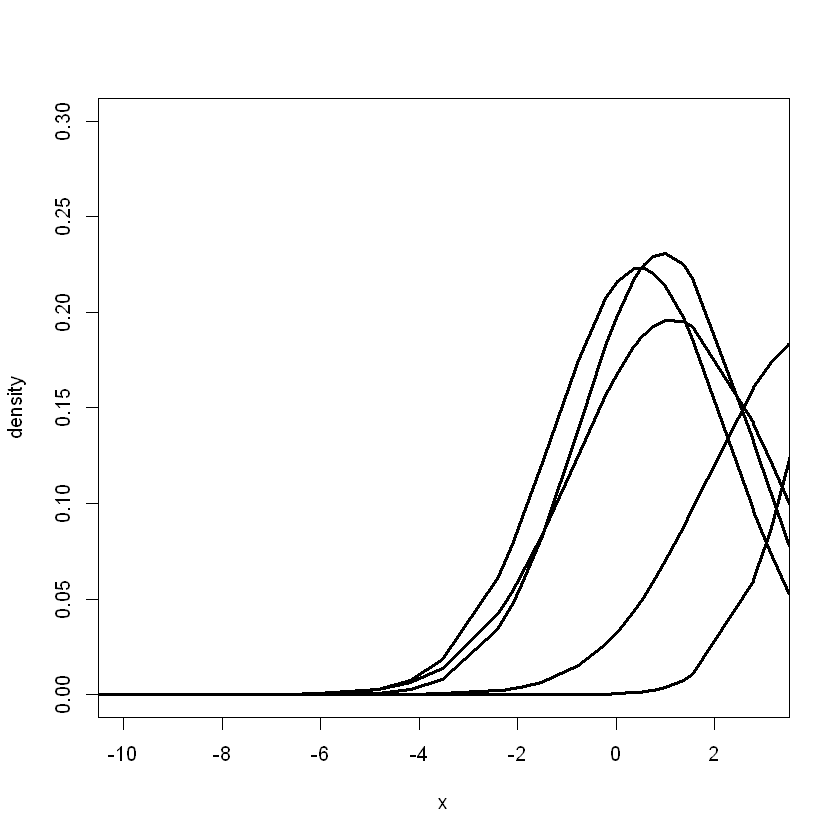

In [31]:
# A.2.7: Simulation of Approximate Distributions

mu <- 3
sigma <- 5
M <- 5
N <- 10
sample_means <- matrix(NA,M,2)
x2 <- NULL

for (m in 1:M) {
    x1 <- rnorm(N,mean=mu,sd=sigma)
    sample_means[m,] <- c(mean(x1),sd(x1)/(N)^(0.5))
    x2 <- c(x2,x1)
}
x2 <- sort(x2)

plot(x2, dnorm(x2,mean=sample_means[1,1],
                sd=sample_means[1,2]), type="l", col="black",
    lwd=3,ylab="density",xlab="x",
    ylim=c(0,0.3),xlim=c(-10,3))

for (m in 2:M) {
    lines(x2, dnorm(x2,mean=sample_means[m,1],sd=sample_means[m,2]), col="black",lwd=3  )
}

In [32]:
# A.2.8: Bootstrap

N <- 10
x1 <- rnorm(N, mean=mu, sd=sigma)
M <- 1000
bs_mean <- matrix(NA,M,1)
for (m in 1:M) {
    index_bs <- round(runif(N,min=1,max=N))
    bs_mean[m,1] <- mean(x1[index_bs])
}
dens_bs <- density(bs_mean)



[1] -2.596642

[1] 0.01352641

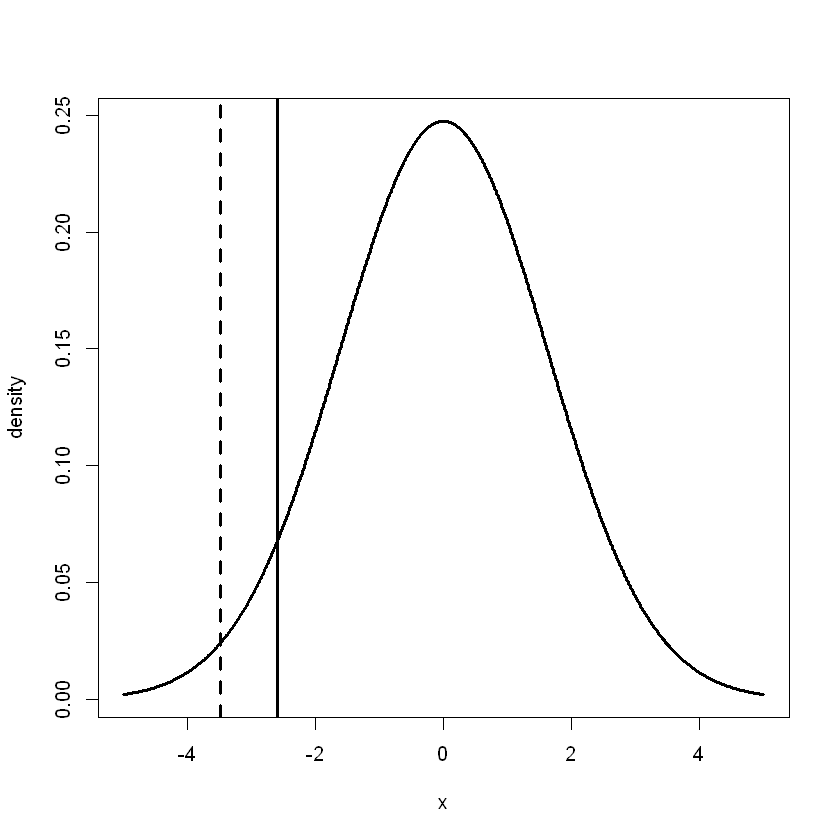

In [33]:
# A.2.9: Hypothesis testing
alpha = 0.05
sd(x)*qnorm(alpha)/sqrt(10)

pnorm(sqrt(10)*(-3.49)/sd(x))

pts = -5 + 10*c(1:1000)/1000

plot(pts, dnorm(pts, sd=(5.10/sqrt(10))), lwd=3, xlab="x",ylab="density",main="",type="l" )
abline(v=-2.597,lwd=3)
abline(v=-3.49,lwd=3,lty=2)

In [34]:
# A.3. Bayesian Statistics
# A.3.3: Determining the posterior in R

log_norm <- function(x, mu, sigma) {
    z = (x - mu)/sigma
    return( sum( log(dnorm(z)) - log(sigma) ) )
}

Theta <- 15*c(1:100)/100 - 10

g <- rep(1/100,100)    # uniform approximation
h <- sapply(Theta, function(theta) log_norm(x1, theta, 5))

gamma <- exp(h + log(g))/sum(exp(h + log(g)))

In [45]:
# A.4. Empirical Bayesian
# A.4.3: Solving for the prior in R

Theta = (max(sample_est) - min(sample_est) )*c(1:300)/300 + min(sample_est)

H <- matrix(NA, 500, 300)

for (i in 1:500) {
    x <- sample_est[i,]
    H[i,] <- sapply(c(1:300), function(k) 
        log_norm(x, mean(Theta[k]), 5))
#     print(i)
}

g0 <- rep(1/300,300)
log_G0 <- log( t(matrix(rep(g0,500),nrow=300)) )
gamma0 <- exp(H + log_G0)/rowSums( exp(H + log_G0) )
g1 <- colSums(gamma0)/sum(gamma0)        # new estimate of prior


In [53]:
log_G1 <- log(t(matrix(rep(g1,500),nrow=300)))
gamma1 <- exp(H + log_G1)/rowSums(exp(H + log_G1))
g2 <- colSums(gamma1)/sum(gamma1)

In [54]:
epsilon <- 1e-3 # small number
g_old <- g1
g_new <- g2
diff <- sum( abs(g_new - g_old) )
while (diff > epsilon) {
    g_old <- g_new
    log_G <- log(t(matrix(rep(g_old,500),nrow=300)))
    gamma <- exp(H + log_G)/sum(exp(H + log_G))
    g_new <- colSums(gamma)/sum(gamma)
    diff <- sum( abs(g_new - g_old) )
}

In [55]:
J <- 10000
g_dist <- unlist(lapply(c(1:300), function(k)
    rep(mean(Theta[k]),round(J*g_new[k]))))


In [56]:
# A.4.4: Estimating the posterior of the mean

h_x1 <- sapply(c(1:300), function(k) log_norm(x1, Theta[k], 5))
gamma_x1 <- exp(h_x1 + log(g_new))/sum(exp(h_x1 + log(g_new)))

In [57]:
J <- 10000
g_dist_x1 <- unlist(lapply(c(1:300), function(k) rep(Theta[k], round(J*gamma_x1[k]))))

In [58]:
# A.5
# A.5.2: Uniform prior (although ridiculous)

f_bin <- function(N, p_hat, p) {
    K = round(p_hat*N)
    return(lchoose(N,K) + K*log(p) + (N-K)*log(1-p))
}

# lchoose gives the log of the binomial coefficient
Theta <- c(1:999)/1000
log_g <- log(rep(1/1000,999))
h_jp <- sapply(Theta, function(theta) f_bin(3,1,theta))
gamma_jp <- exp(h_jp + log_g)/sum(exp(h_jp + log_g))
J <- 100000
gamma_dist_jp <- unlist(lapply(c(1:999), function(j) rep(j,round(J*gamma_jp[j]))))

# mean
sum(gamma_jp*Theta)
                               
                               
# Suggesting that Paciorek's lifetime batting average is (very likely) greather than Ruth's

[1] 0.7995997

In [59]:
sum(gamma_jp[342:999])

# This is the posterior probability of Paciorek's given the assumption that the prior distribution is uniform
# so according to this, Paciorek > Ruth

[1] 0.9863721

In [61]:
# A.5.3: Estimating the prior
M <- 1000
x <- read.csv("C:/Users/Regi Kusumaatmadja/Dropbox/TI Microeconometrics Julia, R and Matlab/R - Microeconometrics R/bat_ave.csv", as.is = TRUE, nrows=M)

# Data set created from Lahman's data
# Limited the observations for computational reasons

H <- matrix(NA, M, 999)

for (m in 1:M) {
    H[m,] <- sapply(Theta, function(theta) f_bin(round(x$AB[m]),x$AVE[m],theta))
#     print(m)
    # sapply uses apply on a vector
}

log_G <- t(matrix(rep(log_g,M),nrow=999))
gamma0 <- exp(H + log_G)/sum(exp(H + log_G))
g1 <- colSums(gamma0)/sum(gamma0)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [62]:
epsilon <- 0.001
g_old <- exp(log_g)
g_new <- g1
diff <- sum(abs(g_new - g_old))
while (diff > epsilon) {
    g_old <- g_new
    Log_G = log(t(matrix(rep(g_old,M),nrow=999)))
    Gamma <- exp(H + Log_G)
    Gamma <- Gamma/rowSums(Gamma)
    g_new <- colSums(Gamma)/sum(Gamma)
    diff <- sum(abs(g_new - g_old))
    print(diff)
}

[1] 0.7563718
[1] 0.2450324
[1] 0.1034591
[1] 0.05391236
[1] 0.03674727
[1] 0.02885031
[1] 0.02401802
[1] 0.02056732
[1] 0.01798698
[1] 0.0159465
[1] 0.01425529
[1] 0.01281427
[1] 0.01158144
[1] 0.01059282
[1] 0.009771702
[1] 0.009078311
[1] 0.008495214
[1] 0.008006107
[1] 0.007586874
[1] 0.007230099
[1] 0.006928884
[1] 0.006678372
[1] 0.006469969
[1] 0.006289327
[1] 0.006131393
[1] 0.005995233
[1] 0.005876905
[1] 0.005767824
[1] 0.005669559
[1] 0.005578165
[1] 0.005493011
[1] 0.005417822
[1] 0.005347304
[1] 0.005280995
[1] 0.005219606
[1] 0.005161161
[1] 0.005105315
[1] 0.005052911
[1] 0.00500408
[1] 0.004956498
[1] 0.004909806
[1] 0.004864249
[1] 0.004819789
[1] 0.004776165
[1] 0.004733249
[1] 0.004691197
[1] 0.004649675
[1] 0.004608638
[1] 0.00456807
[1] 0.004527956
[1] 0.004488282
[1] 0.004449035
[1] 0.004410211
[1] 0.004371824
[1] 0.004333839
[1] 0.004296248
[1] 0.004259044
[1] 0.004222219
[1] 0.004185767
[1] 0.004149682
[1] 0.004113958
[1] 0.004078663
[1] 0.004043761
[1] 0.004009

In [64]:
# A.5.4: Paciorek's posterior

gamma_jp2 <- exp(h_jp + log(g_new))/sum(exp(h_jp + log(g_new)))
J <- 100000
g_dist_mlb <- unlist(lapply(c(1:999), function(j)
    rep(Theta[j], round(J*g_new[j]))))
# lapply uses apply on a list
# unlist turns a list into a vector
gamma_dist_jp2 <- unlist(lapply(c(1:999), function(j)
    rep(Theta[j], round(J*gamma_jp2[j]))))
# mean
sum(gamma_jp2*Theta)
                                
# true lifetime batting average of Paciorek

[1] 0.2506879

In [65]:
sum(gamma_jp2[342:999])

# probability that Paciorek's innate lifetime batting average greater than 0.341 of Ruth is less than 0.005
# this is lot smaller than both 1 and 0.986

[1] 0.004715468